In [36]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size

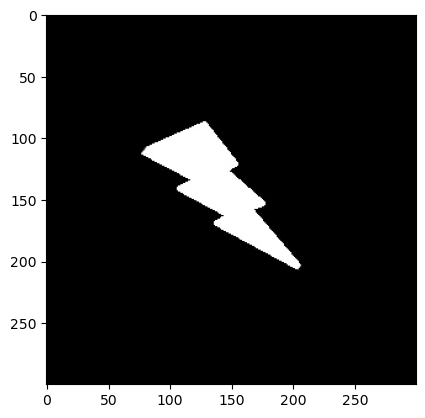

In [37]:
src_original = cv.imread("rayo.png")
src = cv.cvtColor(src_original, cv.COLOR_BGR2GRAY)
ret, th = cv.threshold(src,127,255,0)
plt.imshow(src,cmap="gray")

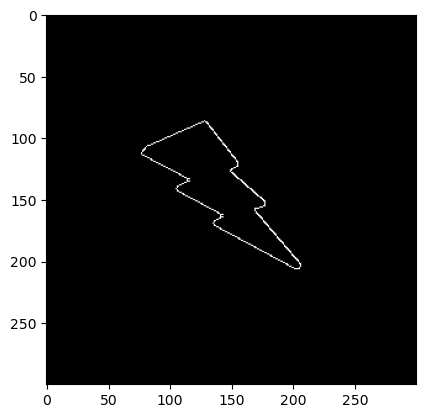

In [38]:
umbral_minimo = 50
umbral_maximo = 100
cn = cv.Canny(th,umbral_minimo,umbral_maximo)
plt.imshow(cn,cmap="gray")

1
Centro: 139, 139
Área: 4933.5  Perímetro: 435.91377425193787


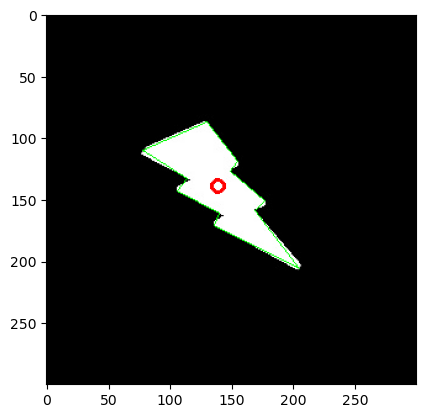

In [39]:
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cnt = contornos[0]
M = cv.moments(cnt)
if M['m00'] != 0:
  cx = int(M["m10"]/M['m00'])
  cy = int(M["m01"]/M['m00'])
  print(f"Centro: {cx}, {cy}")
  cv.circle(src_original, (cx, cy), 5, (255, 0, 0), 2)
area = cv.contourArea(cnt)
perimetro = cv.arcLength(cnt, True)
print(f"Área: {area}  Perímetro: {perimetro}")

approx = cv.approxPolyDP(cnt,0.01*perimetro,True)
cv.drawContours(src_original, [approx], -1, (0,255,0), 1)
plt.imshow(src_original)

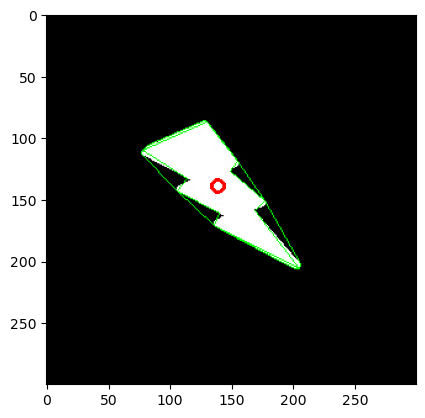

In [40]:
hull = cv.convexHull(cnt)
src2 = src_original.copy()
cv.drawContours(src2, [hull], -1,(0,255,0),1)
plt.imshow(src2)

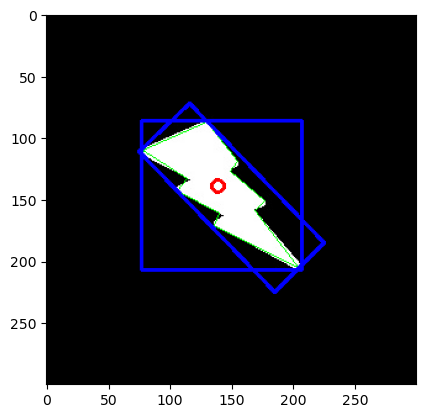

In [41]:
x,y,w,h = cv.boundingRect(cnt)
src2 = src_original.copy()
cv.rectangle(src2,(x,y),(x+w,y+h), (0,0,255),2)

rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.intp(box)
cv.drawContours(src2,[box],0,(0,0,255),2)

plt.imshow(src2)

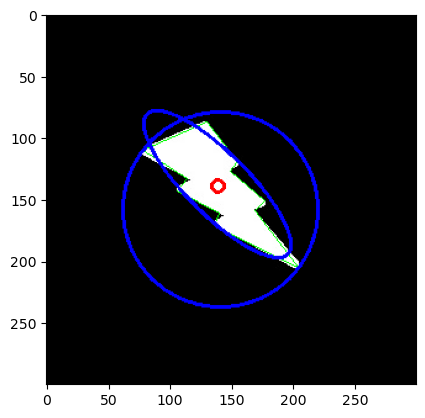

In [42]:
(x,y),radius = cv.minEnclosingCircle(cnt)
src2 = src_original.copy()
cv.circle(src2,(int(x),int(y)),int(radius), (0,0,255),2)
elipse = cv.fitEllipse(cnt)
cv.ellipse(src2,elipse,(0,0,255),2)

plt.imshow(src2)